In [2]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import preprocessing as prep
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import sklearn.metrics as sm
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import tree
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
data_hypo1 = pd.read_csv('./Data/cleaned_hypo1.csv')

# Hypothesis 1 (GNP)

### "We do not believe that there is a correlation between the number of infected individuals in relation to a country's Gross National Product (GNP) per capita."

Copy the covid data to use for hypothesis 1

In [4]:
# Copy data
data_hypothesis_1 = data_hypo1[['location', 'total_cases', 'gdp_per_capita', 'date']]

Get an overview of the data

In [5]:
data_hypothesis_1[['total_cases', 'gdp_per_capita']].describe()

,total_cases,gdp_per_capita
count,2.697960e+05,269796.000000
mean,2.160130e+06,19006.496458
std,8.324078e+06,19569.781223
min,1.000000e+00,661.240000
25%,1.362000e+04,4227.630000
50%,1.208480e+05,12895.635000
75%,8.948930e+05,27717.847000
max,1.034368e+08,116935.600000


In [6]:
data_hypo1['date'] = pd.to_datetime(data_hypo1['date'])

In [7]:
years = data_hypo1['date'].dt.year.unique()
years

array([2020, 2021, 2022, 2023, 2024])

Piechart to show  the top 5 countries with the highest average total cases for each year that we have data for as a single graph.

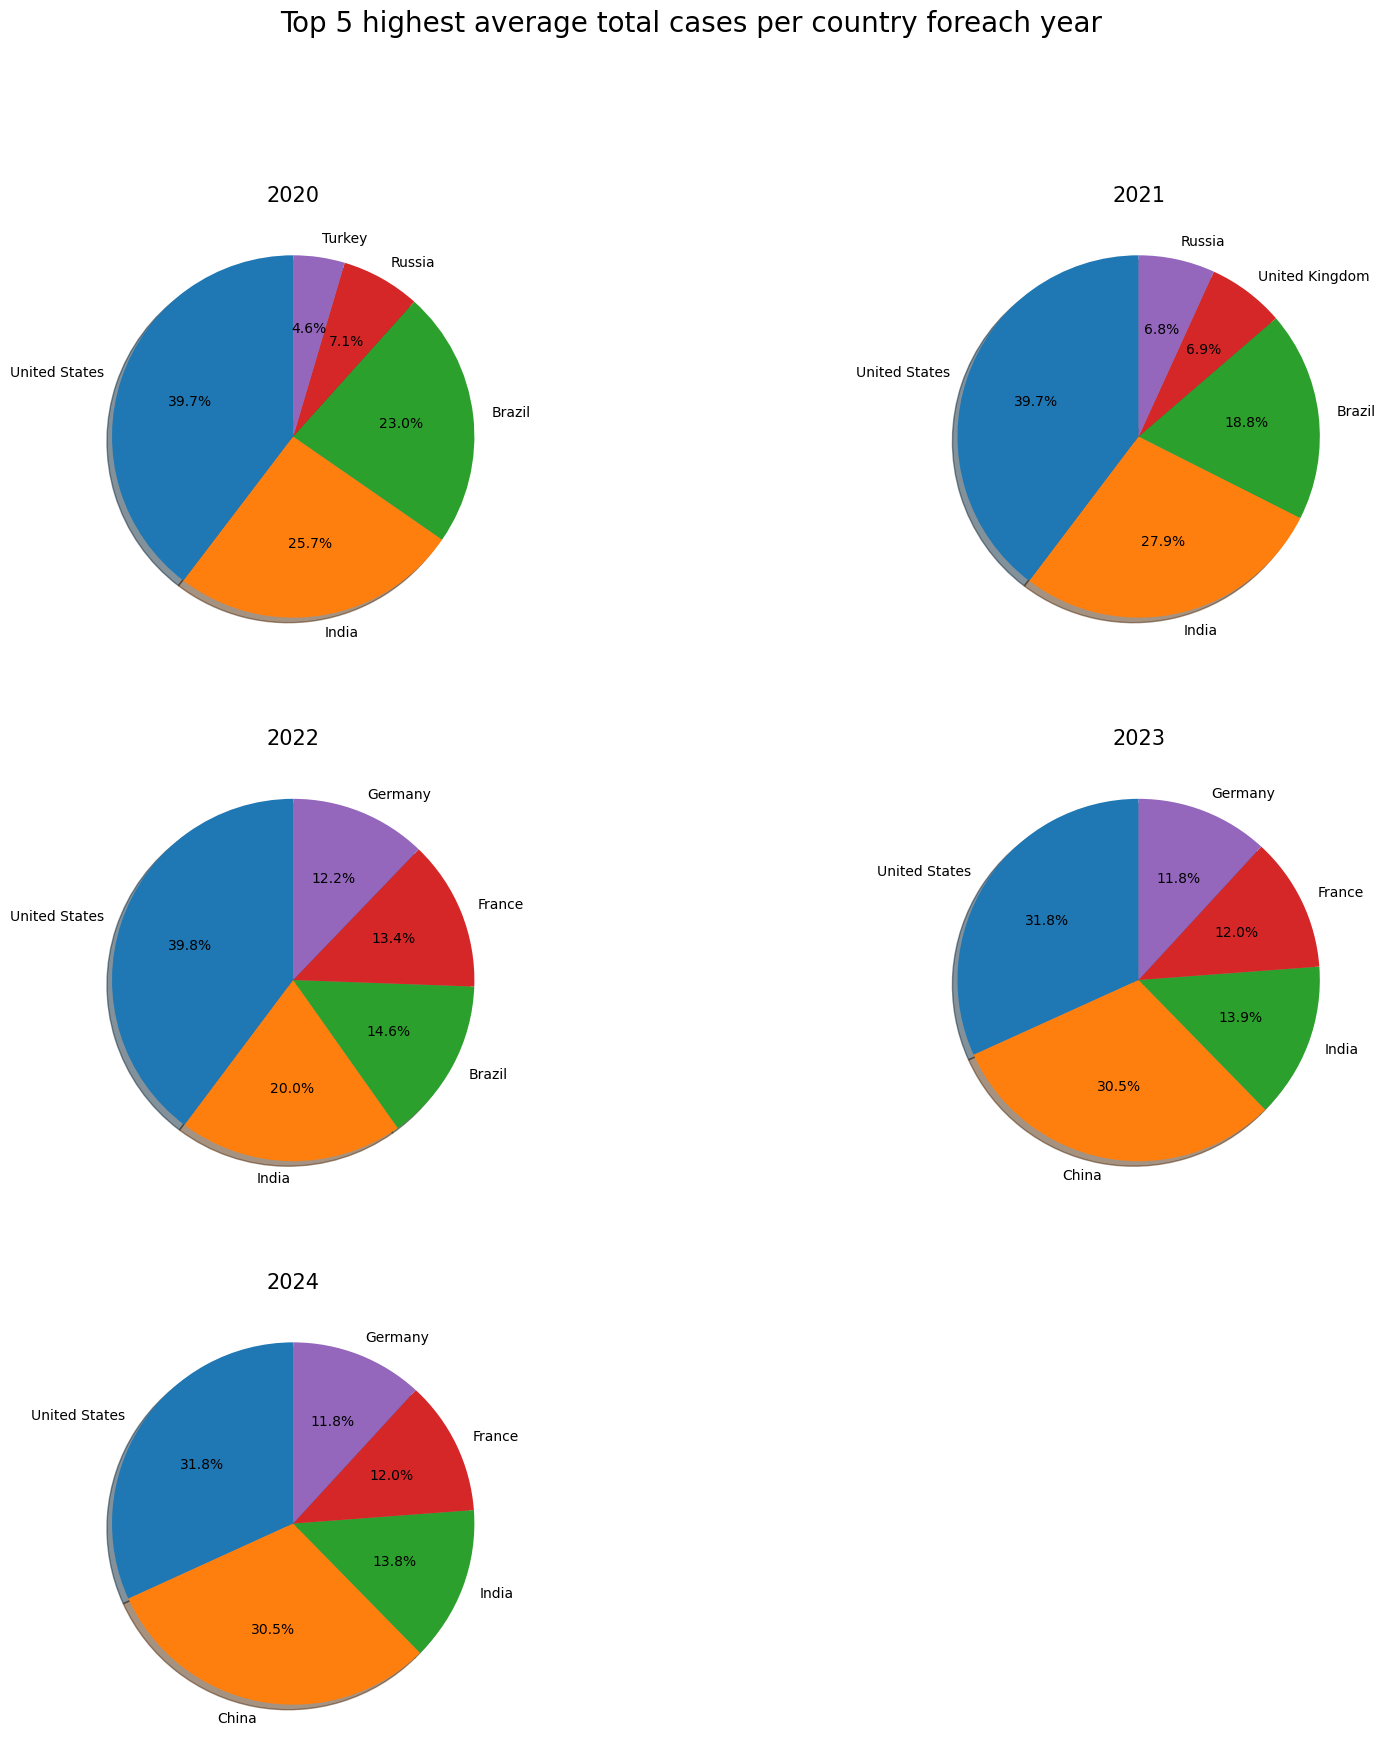

In [8]:

fig = plt.figure(figsize=(20, 20))

for i, y in enumerate(years, start=1):
    plt.subplot(3, 2, i)
     # get the avg total cases per country for the year
    avg_total_cases = data_hypo1[data_hypo1['date'].dt.year == y].groupby('location')['total_cases'].mean()
    avg_total_cases = avg_total_cases.reset_index()
    avg_total_cases = avg_total_cases.sort_values(by='total_cases', ascending=False)
    # get the top 5 countries
    top_5 = avg_total_cases.head(5)
    plt.pie(top_5['total_cases'], labels=top_5['location'], autopct='%.1f%%',
            startangle=90, shadow=True)
    plt.title(y, fontsize=15)

plt.suptitle('Top 5 highest average total cases per country foreach year', fontsize=20)
plt.show()

Get the last row for each countries latest observation

In [9]:

last_row = data_hypothesis_1.groupby('location').last().reset_index()
last_row.sample(5)

,location,total_cases,gdp_per_capita,date
123,Niger,9515.0,926.000,2024-02-18
165,Suriname,82496.0,13767.119,2024-02-18
8,Australia,11785451.0,44648.710,2024-02-18
59,Fiji,69047.0,8702.975,2024-02-18
65,Germany,38437756.0,45229.245,2024-02-18


Check if the last row for each country has the same date, so the data fits

In [10]:

last_row['date'].max() == last_row['date'].min()

True

We then create a subset of the data to use for the graph, where it is sorted by the total_cases

In [11]:
# graph of the cumulative cases per country
data_hypothesis_1_subset = last_row.sort_values('total_cases', ascending=False)
plt.figure(figsize=(200,100))
sns.barplot(x='location', y='total_cases', data=data_hypothesis_1_subset)
plt.xticks(rotation=90)
plt.show()

In [12]:
# graph of the cumulative cases per country
data_hypothesis_1_subset = last_row.sort_values('gdp_per_capita', ascending=False)
plt.figure(figsize=(200,100))
sns.barplot(x='location', y='gdp_per_capita', data=data_hypothesis_1_subset)
plt.xticks(rotation=90)
plt.show()

Scatterplot to show gdp_per_capita as x and total_cases for each country as y

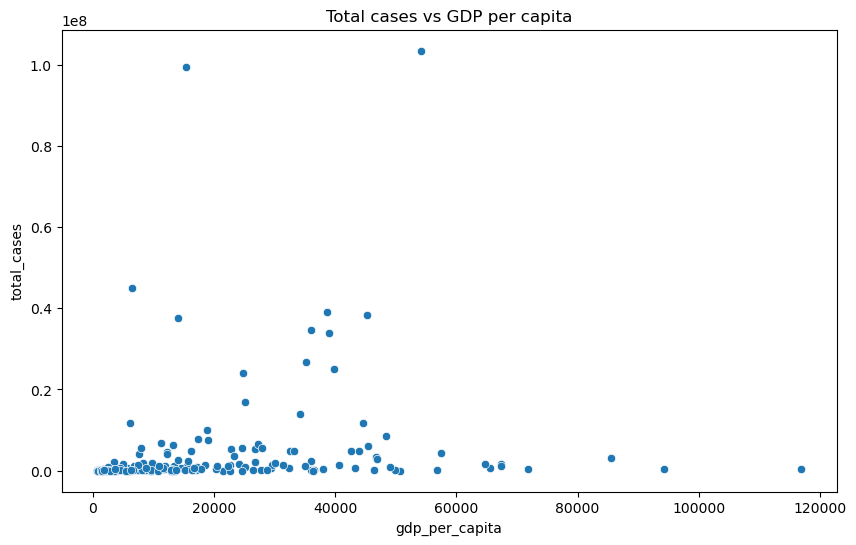

In [13]:
# scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gdp_per_capita', y='total_cases', data=last_row)
plt.title('Total cases vs GDP per capita')
plt.show()

Here we can see the each country's BNP per capita and the number of infected people in the country. We can also see that there is 3 outliers in the data. These are (China), (USA) and (Italy). We will remove these from the data to get a better overview of the data.

In [14]:
from sklearn.preprocessing import PolynomialFeatures
import math

In [15]:
class mul_lin_reg_model:
    r2_score_ = 0
    MAE = 0
    MSE = 0
    RMSE = 0
    eV = 0

    def __init__(self, X, y):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y,  random_state=123, test_size=0.15)
        self.reg = LinearRegression()
        self.reg.fit(self.X_train, self.y_train)
        self.X = X
        self.y = y
    def predict(self, input):
        return self.reg.predict(input)
    
    def do_scoring_(self, y_test, y_predicted):
        self.MAE = metrics.mean_absolute_error(y_test, y_predicted) 
        self.MSE = metrics.mean_squared_error(y_test, y_predicted)
        self.RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_predicted))
        self.eV = round(sm.explained_variance_score(y_test, y_predicted), 2)
        self.r2_score_ = r2_score(y_test, y_predicted)

In [16]:
def train_mul_lin_reg(dataset):
    country_subset = dataset.groupby('location').last().reset_index()
    x_col = 'gdp_per_capita'
    y_col = 'total_cases'
    X = country_subset[x_col].values.reshape(-1, 1)
    y = country_subset[y_col].values.reshape(-1, 1)
    return mul_lin_reg_model(X,y)

In [17]:
print(data_hypo1.groupby('location').last().reset_index().sort_values('total_cases').head(5))
print(data_hypo1.groupby('location').last().reset_index().sort_values('total_cases').tail(5))

                  location iso_code  total_cases  gdp_per_capita       date
177                 Tuvalu      TUV       2943.0        3575.104 2024-02-18
89                Kiribati      KIR       5085.0        1981.132 2024-02-18
118                  Nauru      NRU       5393.0       12895.635 2024-02-18
129                  Palau      PLW       6265.0       13240.405 2024-02-18
143  Saint Kitts and Nevis      KNA       6607.0       24654.385 2024-02-18
          location iso_code  total_cases  gdp_per_capita       date
65         Germany      DEU   38437756.0       45229.245 2024-02-18
61          France      FRA   38997490.0       38605.671 2024-02-18
77           India      IND   45028053.0        6426.674 2024-02-18
37           China      CHN   99331724.0       15308.712 2024-02-18
182  United States      USA  103436829.0       54225.446 2024-02-18


In [18]:
lin_reg_model = train_mul_lin_reg(data_hypo1)

model scoring: mae: 515809645.1604353, mse: 2.0002726731817142e+18, rmse: 1414309963.6153717, r2_score: -17575.336590090305, eV: -15237.48
[[124.44423385]] [1630638.51791867]


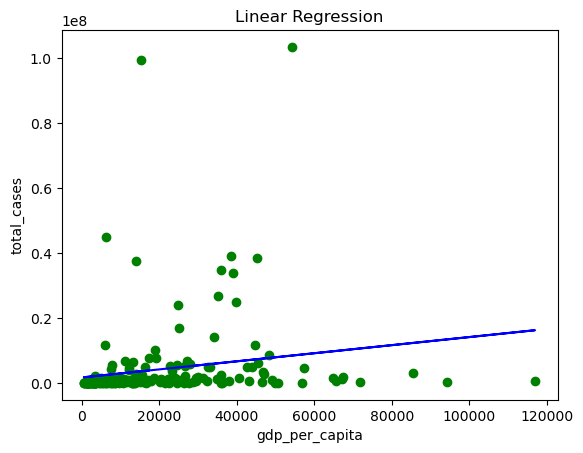

In [19]:
model = lin_reg_model
predictions = model.predict(model.y_test)
#print(predictions)
model.do_scoring_(model.y_test, predictions)
print(f"model scoring: mae: {model.MAE}, mse: {model.MSE}, rmse: {model.RMSE}, r2_score: {model.r2_score_}, eV: {model.eV}")
# Visualise the Linear Regression
a = model.reg.coef_
b = model.reg.intercept_
print(a, b)
plt.title(f'Linear Regression')
plt.scatter(model.X, model.y, color='green')
plt.plot(model.X_train, a*model.X_train+b , color='blue')
#plt.plot(model.X_test, predictions, color='orange')
plt.xlabel('gdp_per_capita')
plt.ylabel('total_cases')
plt.show()
